In [28]:
# Install required Python packages
# Use the latest compatible version of dlib
#%pip install numpy face_recognition opencv-python 


In [9]:
import face_recognition
import os
import numpy as np

## Training Data


In [31]:
training_dir_path = r"/Users/seanm/Downloads/Patrick_photos"

# now some conversion

#get filetype
def get_file_type(filename):
    return filename.split('.')[-1].lower()


#Now let's check we have JPgs
for dirpath, dirnames, filenames in os.walk(training_dir_path):
    for filename in filenames:
        print(get_file_type(filename))





heic
heic
ds_store
heic
heic
zip
zip
heic
heic
heic
jpg
jpg
jpg
jpg
jpg
jpg
jpg


In [39]:
import os
import face_recognition

def make_patrick_encodings(path):
    """
    Create a list of encodings for all images in the specified directory and its subdirectories.
    """
    encodings = []
    for dirpath, _, filenames in os.walk(path):  # Traverse all subdirectories
        for filename in filenames:  # Iterate over filenames
            if filename.endswith(".jpg") or filename.endswith(".png"):
                image_path = os.path.join(dirpath, filename)  # Use dirpath for subdirectories
                if os.path.exists(image_path):  # Check if the image file exists
                    print(image_path)
                    image = face_recognition.load_image_file(image_path)
                    image_encodings = face_recognition.face_encodings(image)
                    if image_encodings:
                        encodings.append(image_encodings[0])
                else:
                    print(f"File not found: {image_path}")  # Log missing files
    return encodings

# Create encodings for Patrick's images
patrick_encodings = make_patrick_encodings(training_dir_path)

/Users/seanm/Downloads/Patrick_photos/jpegmini_optimized2/IMG_1745.jpg
/Users/seanm/Downloads/Patrick_photos/jpegmini_optimized2/IMG_0883.jpg
/Users/seanm/Downloads/Patrick_photos/jpegmini_optimized/IMG_2002.jpg
/Users/seanm/Downloads/Patrick_photos/jpegmini_optimized/IMG_1709.jpg
/Users/seanm/Downloads/Patrick_photos/jpegmini_optimized/IMG_1552.jpg
/Users/seanm/Downloads/Patrick_photos/jpegmini_optimized/IMG_2025.jpg
/Users/seanm/Downloads/Patrick_photos/jpegmini_optimized/IMG_1717.jpg


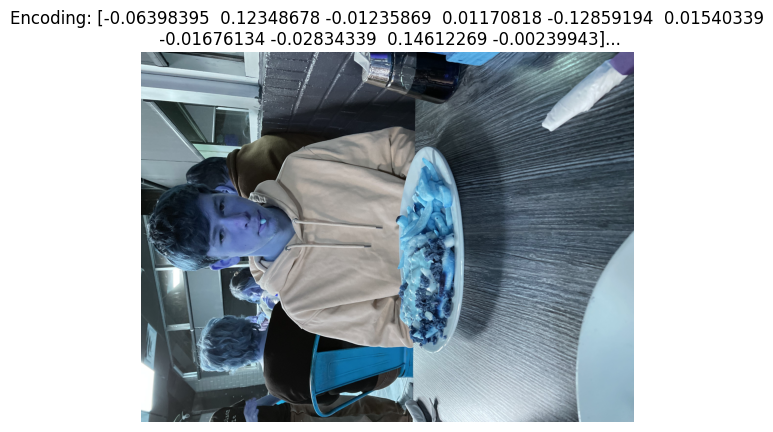

In [43]:
#visualize encodings
import matplotlib.pyplot as plt
import cv2

def show_image_with_encodings(image_path, encoding):
    img = face_recognition.load_image_file(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Encoding: {encoding[:10]}...")  # Show part of the encoding for brevity
    plt.show()

show_image_with_encodings(training_dir_path+"/jpegmini_optimized/IMG_1717.jpg", patrick_encodings[0])  # Show the first encoding as an example